# Facebook Ads Time-series & ROMI Analysis

### Author: Svitlana Prasolova

# Project Description
Analysis of Facebook advertising performance using a Jupyter Notebook and Python (Pandas, NumPy, Matplotlib/Seaborn). The notebook loads facebook_ads_data.csv, performs daily and campaign-level aggregations, computes ROMI, visualizes trends and distributions, inspects correlations, and fits a regression between ad spend and value.

## Project Task:
Through the use of Pandas, NumPy, Matplotlib, and Seaborn, the project demonstrates how to:
- Analyze daily advertising spend and ROMI across 2021;
- Apply moving averages to smooth time-series data;
- Compare campaign-level efficiency via bar charts and box plots;
- Visualize ROMI distribution and correlation between performance metrics;
- Build a regression model to explore the relationship between total_spend and total_value.
The outcome is a complete analytical notebook that supports data-driven insights into Facebook Ads effectiveness and campaign optimization.

## Results
The analysis provided a clear view of advertising effectiveness:
- Identified campaigns with the highest ROMI.
- Visualized daily trends and seasonal patterns in advertising spend.
- Identified strong correlations between ad spend, impressions, clicks, and total value.

# Process
### Preparing work environment
I will be using Python for the data transformation and research. The following libraries are installed:

In [9]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [10]:
df_fb = pd.read_csv(r"C:\Users\Світлана\Pictures\Data analuzes\Python\facebook_ads_data (2.0).csv")
df_fb.head()                                                    # Verifying the data

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [11]:
df_fb.info()                       #Preparing for analysis: revealing information about column names and their data type                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [12]:
df_fb['ad_date'] = pd.to_datetime(df_fb['ad_date'], errors='coerce')       #  Converting a date in text form (object) to datetime format
df_fb.info()                                                               # Checking the result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ad_date            1494 non-null   datetime64[ns]
 1   campaign_name      1494 non-null   object        
 2   total_spend        1494 non-null   float64       
 3   total_impressions  1494 non-null   int64         
 4   total_clicks       1494 non-null   int64         
 5   total_value        1494 non-null   float64       
 6   cpc                1443 non-null   float64       
 7   cpm                1462 non-null   float64       
 8   ctr                1462 non-null   float64       
 9   romi               1462 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 116.8+ KB


#### 1. Group the data by day and construct two graphs for the grouped data

In [13]:
daily_grouped = (df_fb.groupby('ad_date')                  # Grouping by day (sum of quantitative indicators and average of relative indicators for each day)
    .agg({
        'total_spend': 'sum',
        'total_impressions': 'sum',
        'total_clicks': 'sum',
        'total_value': 'sum',
        'cpc': 'mean',
        'cpm': 'mean',
        'ctr': 'mean',
        'romi': 'mean'
    })
    .reset_index()
)

print(daily_grouped.head())

     ad_date  total_spend  total_impressions  total_clicks  total_value   cpc  \
0 2020-11-11         1.89               1800            45         2.38  0.04   
1 2020-11-12        23.00              10473           397        21.13  0.06   
2 2020-11-13         6.36              11669           451         9.77  0.01   
3 2020-11-14         7.27               5005           392        12.67  0.02   
4 2020-11-15         6.98              12465           657        10.96  0.01   

    cpm       ctr      romi  
0  1.05  0.025000  1.259259  
1  2.20  0.037907  0.918696  
2  0.55  0.038649  1.536164  
3  1.45  0.078322  1.742779  
4  0.56  0.052708  1.570201  


In [14]:
df_2021 = daily_grouped[(daily_grouped['ad_date'] >= '2021-01-01') &    # Filtering data only for 2021    
    (daily_grouped['ad_date'] <= '2021-12-31')]

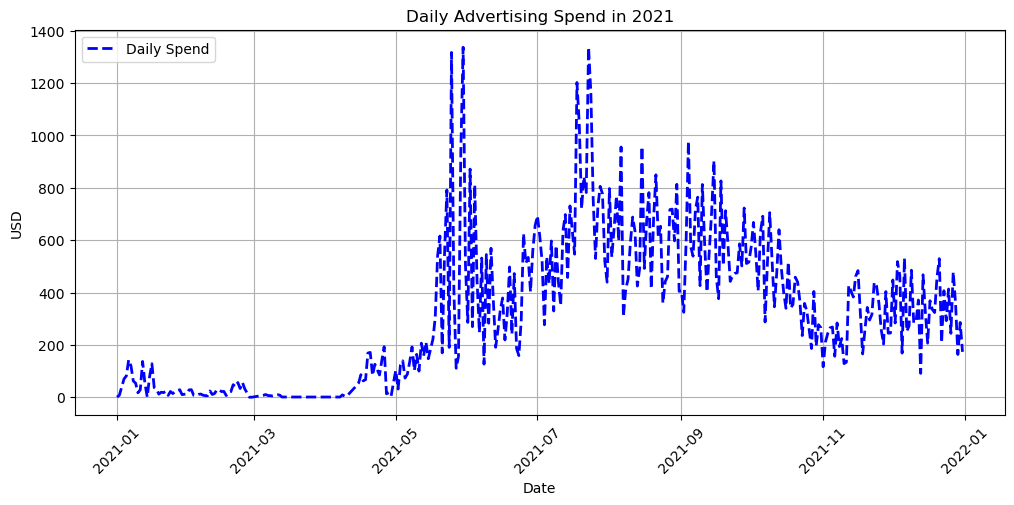

In [15]:
plt.figure(figsize=(12, 5))                                           # Building a line (linestyle / plt) graph 'Daily Advertising Spend in 2021'
plt.plot('ad_date', 'total_spend', data=df_2021, label='Daily Spend', color='blue', linestyle='--', linewidth=2)

plt.legend(loc='upper left')
plt.title('Daily Advertising Spend in 2021')

plt.xlabel('Date')
plt.ylabel('USD')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

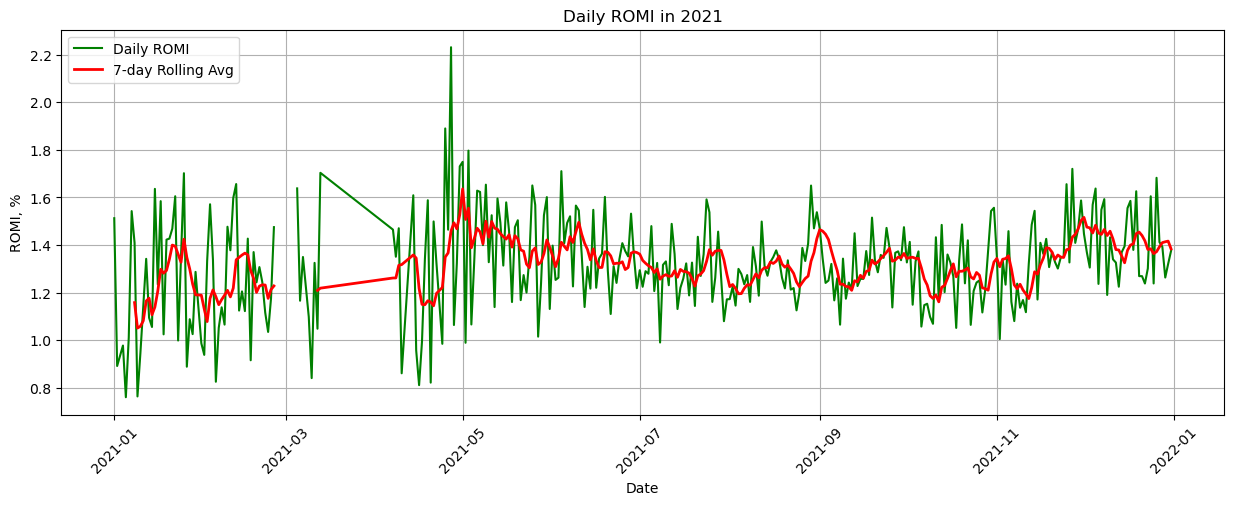

In [16]:
plt.figure(figsize=(15, 5))                                                        # Line graph (plt) with daily ROMI in 2021
plt.plot(df_2021['ad_date'], df_2021['romi'], label='Daily ROMI', color='green')
plt.plot(df_2021['ad_date'], df_2021['romi'].rolling(window=7).mean(),
         label='7-day Rolling Avg', color='red', linewidth=2)                       # Including the rolling average line rolling() ROMI

plt.title('Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI, %')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 2.Group the data by campaign name and build two graphs: total advertising spending in each campaign; total ROMI in each campaign.

In [17]:
name_grouped = (df_fb.groupby('campaign_name')                  # Grouping data by day and company names
    .agg({
        'total_spend': 'sum',
        'total_impressions': 'sum',
        'total_clicks': 'sum',
        'total_value': 'sum',
        'cpc': 'mean',
        'cpm': 'mean',
        'ctr': 'mean',
        'romi': 'mean'
    })
    .reset_index()
)

print(name_grouped.head())

     campaign_name  total_spend  total_impressions  total_clicks  total_value  \
0            Brand       539.92             893854           542       670.15   
1  Crazy discounts      2175.29            1401511         19627      2583.59   
2        Discounts      2856.39            1256069         33353      3516.27   
3      Electronics     23920.42            7070770         51593     29169.38   
4        Expansion     67212.82            3736092         37469     83288.66   

        cpc        cpm       ctr      romi  
0  1.835679   1.148800  0.000666  1.241293  
1  0.164839   2.151129  0.017148  1.208851  
2  0.134227   3.502371  0.034183  1.247111  
3  0.632765   4.654471  0.009514  1.225274  
4  4.132193  24.141228  0.008970  1.237941  


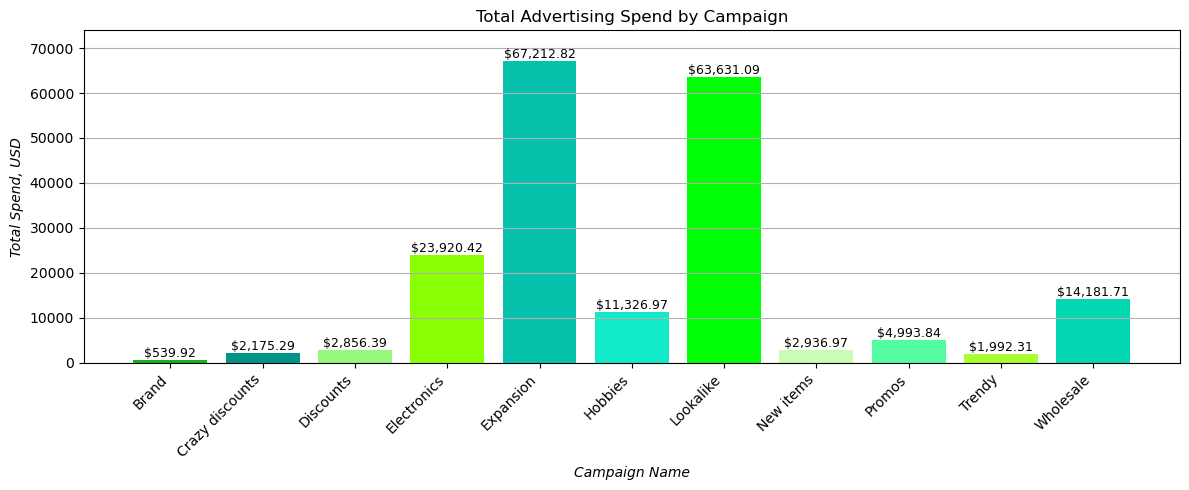

In [18]:
if 'campaign_name' not in name_grouped.columns:
    name_grouped = name_grouped.reset_index()

plt.figure(figsize=(12, 5))                              

bars = plt.bar(name_grouped['campaign_name'],            # Building a graph (bar / plt) of total advertising costs + binding colors to company names
    name_grouped['total_spend'],
    color=['#15b01a', '#029386', '#96f97b', '#89fe05', '#06c2ac',
           '#13eac9', '#01ff07', '#c7fdb5', '#53fca1', '#aaff32', '#04d8b2'])

plt.title('Total Advertising Spend by Campaign')          # Title graph
plt.xlabel('Campaign Name', fontstyle='italic')           # Axis x name
plt.ylabel('Total Spend, USD', fontstyle='italic')        # Axis y name
plt.ylim(0, name_grouped['total_spend'].max() * 1.1)

for bar in bars:                                          # Captions above the columns
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height, f'${height:,.2f}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

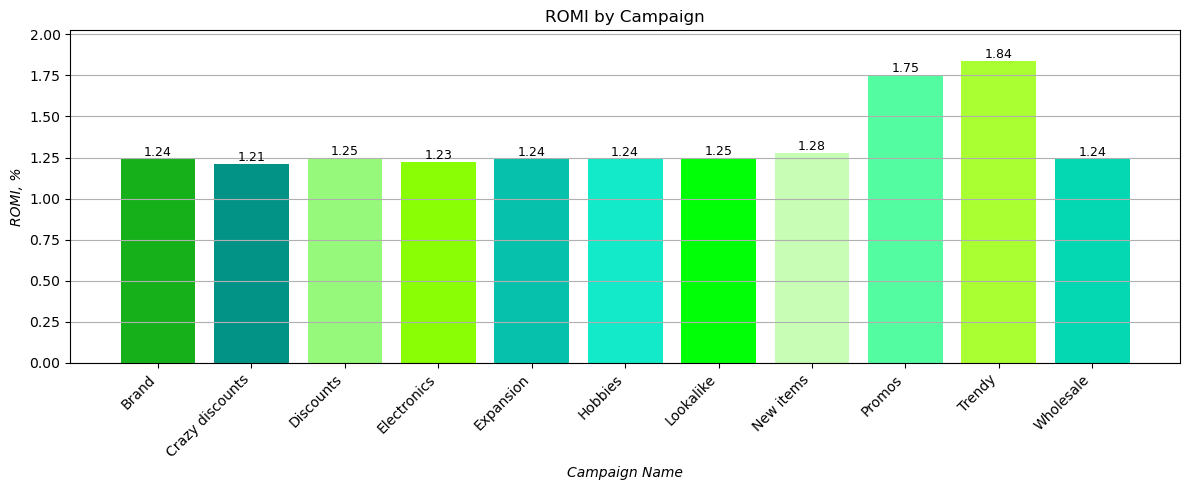

In [43]:
if 'campaign_name' not in name_grouped.columns:
    name_grouped = name_grouped.reset_index()

plt.figure(figsize=(12, 5))                           

bars = plt.bar(name_grouped['campaign_name'],                                           # Building a graph (bar/plt) total ROMI in each campaign
    name_grouped['romi'], color=['#15b01a', '#029386', '#96f97b', '#89fe05', '#06c2ac',
          '#13eac9', '#01ff07', '#c7fdb5', '#53fca1', '#aaff32', '#04d8b2'])            # Binding colors to company names 

plt.title('ROMI by Campaign')
plt.xlabel('Campaign Name', fontstyle='italic')
plt.ylabel('ROMI, %', fontstyle='italic')
plt.ylim(0, name_grouped['romi'].max() * 1.1)

for bar in bars:                                                                        # Captions above the columns
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 3. Using a box plot, determine the spread of daily ROMI in each campaign (by campaign name)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_grouped = (df_fb.groupby(['ad_date','campaign_name'])                  # Grouping data by day and company names
    .agg({
        'total_spend': 'sum',
        'total_impressions': 'sum',
        'total_clicks': 'sum',
        'total_value': 'sum',
        'cpc': 'mean',
        'cpm': 'mean',
        'ctr': 'mean',
        'romi': 'mean'
    })
    .reset_index()
)

print(df_grouped.head())

     ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0 2020-11-11     Discounts         1.89               1800            45   
1 2020-11-12     Discounts        23.00              10473           397   
2 2020-11-13     Discounts         6.36              11669           451   
3 2020-11-14     Discounts         7.27               5005           392   
4 2020-11-15     Discounts         6.98              12465           657   

   total_value   cpc   cpm       ctr      romi  
0         2.38  0.04  1.05  0.025000  1.259259  
1        21.13  0.06  2.20  0.037907  0.918696  
2         9.77  0.01  0.55  0.038649  1.536164  
3        12.67  0.02  1.45  0.078322  1.742779  
4        10.96  0.01  0.56  0.052708  1.570201  


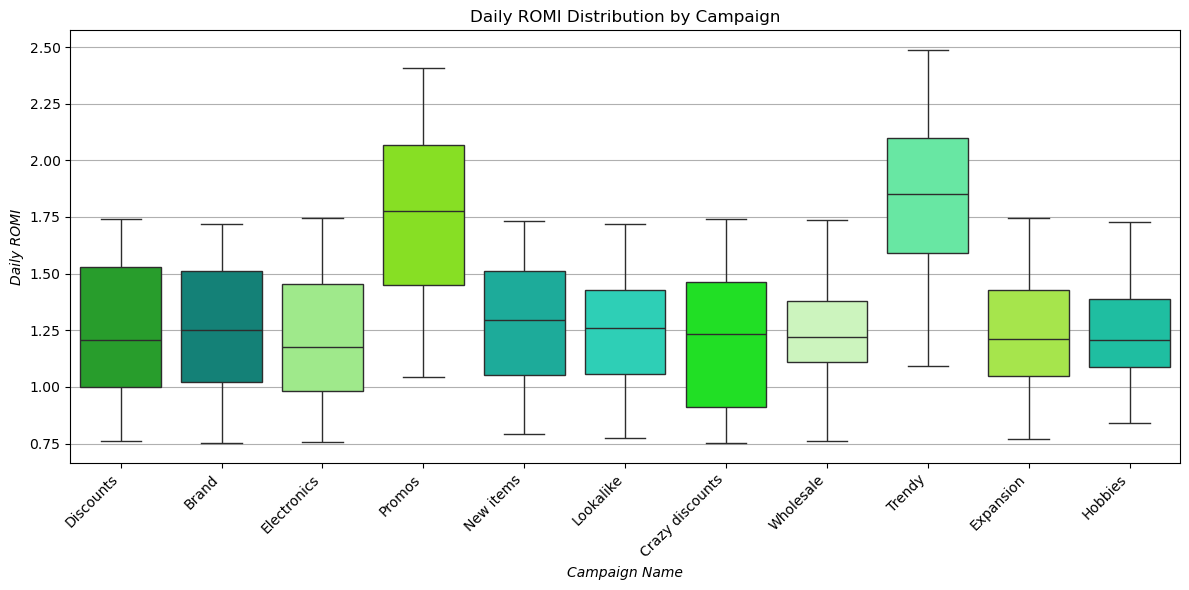

In [21]:
colors = ['#15b01a', '#029386', '#96f97b', '#89fe05', '#06c2ac',
          '#13eac9', '#01ff07', '#c7fdb5', '#53fca1', '#aaff32', '#04d8b2']
palette = dict(zip(df_grouped['campaign_name'].unique(), colors))           # Binding selected colors to 11 unique company names

plt.figure(figsize=(12, 6))                                                                                                                                               
sns.boxplot(data=df_grouped,                                                # Building a boxplot / sns to determine the spread of daily ROMI
    x='campaign_name',
    y='romi',
    hue='campaign_name',                                                    # Adding the hue argument to match the color palette with company names
    palette=palette,
    legend=False )                                                          # Turning off the legend because it duplicates the labels on the X axis

plt.title('Daily ROMI Distribution by Campaign')
plt.xlabel('Campaign Name', fontstyle='italic')
plt.ylabel('Daily ROMI', fontstyle='italic')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### 4. Construct a histogram with the distribution of ROMI values in the facebook_ads_data.csv table 

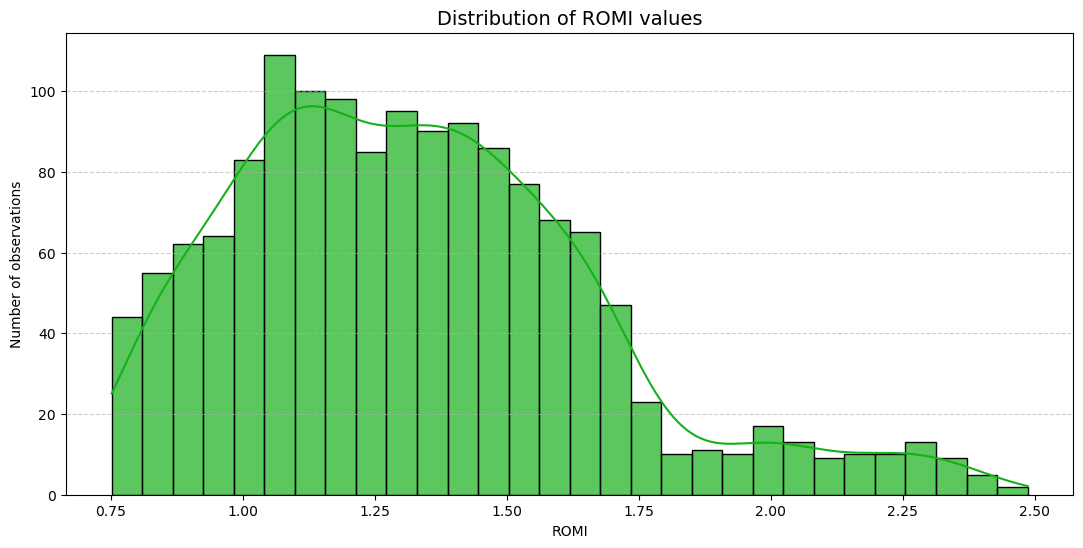

In [22]:
plt.figure(figsize=(13, 6))              # Construct a histogram/sns with the distribution of ROMI values in the df_fb table     
sns.histplot(data=df_fb,
    x="romi",
    bins=30,
    kde=True,
    color=colors[0],                     # Use one color from the color palette
    alpha=0.7 )

plt.title("Distribution of ROMI values", fontsize=14)
plt.xlabel("ROMI")
plt.ylabel("Number of observations")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

#### 5.Build a heat map of the correlation between all the numerical indicators in the facebook_ads_data.csv table.

In [23]:
from matplotlib.colors import LinearSegmentedColormap              # Colormap in the matplotlib.colors

In [24]:
numeric_df = df_fb.select_dtypes(include=['float64', 'int64'])     # 1. Select only numeric columns from the table

In [25]:
corr_matrix = numeric_df.corr()                                    # 2. Create a new variable to calculate the pairwise correlation matrix 

In [26]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256) # 3. Create a color palette from the colors defined above for the heat map

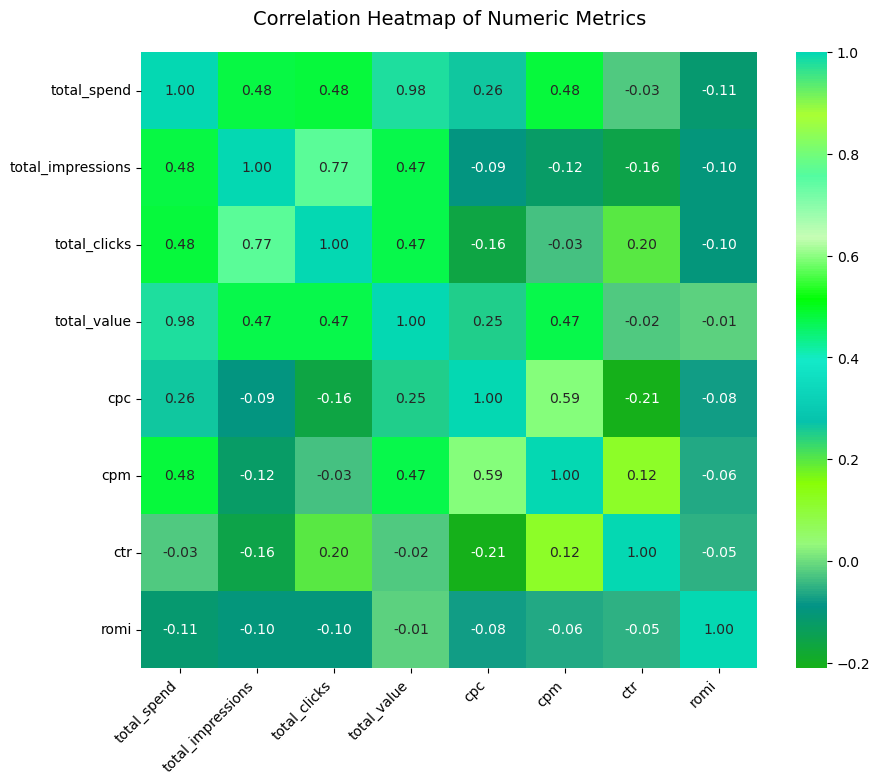

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,                                           # 4. Build a heatmap/sns
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,                                              # use custom palette
    cbar=True,
    square=True )

plt.title("Correlation Heatmap of Numeric Metrics", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.show()

##### The heat map of the correlation between all numeric indicators in the facebook_ads_data.csv table. shows:
1) The highest correlation is shown by the pairs: total_spend and total_value (0.98); total_impressions and total_clicks (0.77); cpc and cpm (0.59)
2) The pair with the highest negative correlation is: cpc and ctr (-0.21)
3) The pairs with the lowest correlation are: total_value and romi (-0.01); total_value and ctr (-0.02)
4) Total_value correlates with total_spend (0.98)

#### 6. Construct a scatter plot with a linear regression built on the data from "total_spend" and "total_value"

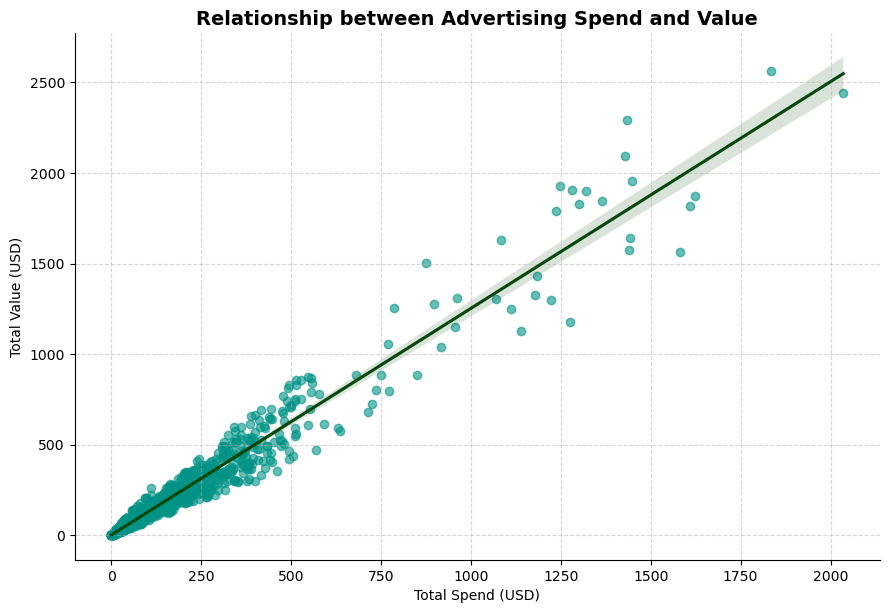

In [32]:
sns.lmplot(data=df_fb,                              # Construct a scatter plot (implot)/sns
    x="total_spend",                                # Total_spend in the x axis
    y="total_value",                                # Total value in the y axis
    height=6,
    aspect=1.5,
    scatter_kws={"alpha":0.6, "color":"#029386"},   # Points (semi-transparent)
    line_kws={"color":"#06470c"} )                  # Regression line


plt.title("Relationship between Advertising Spend and Value", fontsize=14, fontweight="bold")
plt.xlabel("Total Spend (USD)")
plt.ylabel("Total Value (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()